C:\Users\luojiawei\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10


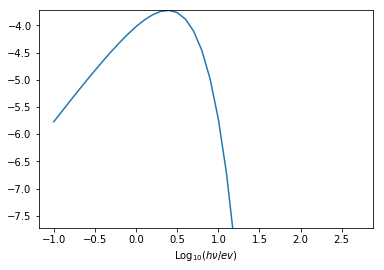

In [27]:
import numpy as np
from matplotlib import pyplot as p
%matplotlib inline

hcont=6.625e-27
ccont=3.e10
kcont=1.381e-16
rcont=8.314472e7
Gcont=6.67e-8
Msun=1.989e33
Lsun=3.827e33
rsun=6.96e10
yr=365.*24.*3600
pi=3.1415926
au=1.49598e13
pc=3.085678e18
ev=1.6022e-12
sigma = 5.67*10**-5

def BlackbodyBnu(Temperature, nu):
    return 2.*hcont*nu**3/ccont**2/(np.exp(hcont*nu/kcont/Temperature)-1)

hnu=10.**np.arange(-1,4,0.1)*ev 

# white dwarf a single blackbody at 1e4 K

Bnu=np.array(hnu.size)
Temperature=1.e4

Bnu=BlackbodyBnu(Temperature,hnu/hcont)

p.plot(np.log10(hnu/ev),np.log10(Bnu))
p.ylim(np.log10(Bnu.max())-4.,np.log10(Bnu.max()))
p.xlabel(r'Log$_{10}(h\nu/ev)$')
p.show()

# Question 1, what is the spectrum (Flux(pi*intensity) integrated over area) from the white dwarf 
# assuming the radius of the white dwarf is 10^4 km?

# Question 2, We have an accretion disk around the white dwarf accreting at 10^{-9} Msun/year, what is the spectrum? 
# The accretion disk extends from white dwarf  surface to 100 white dwarf surface. The white dwarf mass is one solar mass

# Question 3, Now we have an accretion disk around the neutron star, accreting at the same rate, what is the spectrum?

# Question 4, Now we have an accreiotn disk around a solar mass blackhole. 
# For a non-rotating blackhole, the innermost stable orbit is 3 rs, For a maximum prograte spinning black hole, 
# the inner most stable orbit is 0.5 rs. For a maximum retrograte spinning blackhole, the innermost orbit is
# 4.5 rs. Calculate the spectra for these three cases

C:\Users\luojiawei\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


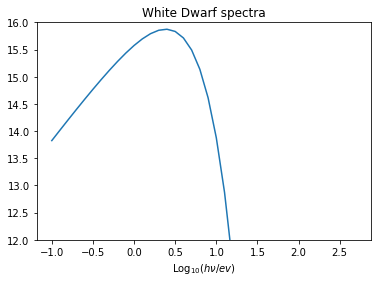

In [28]:
Flux = np.pi * Bnu
Radius = 10**9 # centimeter
Spectrum = Flux * 4*np.pi*Radius**2
p.plot(np.log10(hnu/ev),np.log10(Spectrum))
p.ylim(12,16)
p.title('White Dwarf spectra')
p.xlabel(r'Log$_{10}(h\nu/ev)$')
p.show()

C:\Users\luojiawei\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
C:\Users\luojiawei\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


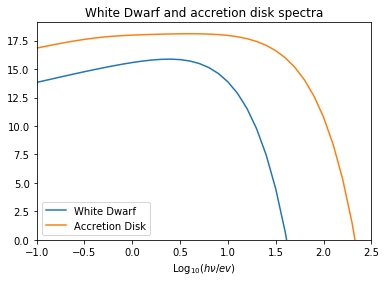

In [29]:
M_dot = 10**(-9) * Msun / yr
def Temp(M,M_dot,r):
    return ((Gcont*M*M_dot)/(8*np.pi*sigma))**(1/4)*r**(-3/4)
dr = 0.1
Radii = np.arange(1,100+dr,dr) * Radius
Temps = Temp(Msun,M_dot,Radii)
Spectrums=np.pi * BlackbodyBnu(Temps[:, np.newaxis], hnu/hcont) *4*np.pi*Radii[:,np.newaxis] * dr*Radius
Spectrum_sum = np.sum(Spectrums,0)

p.plot(np.log10(hnu/ev),np.log10(Spectrum),label='White Dwarf')
p.plot(np.log10(hnu/ev),np.log10(Spectrum_sum), label='Accretion Disk')
p.ylim(0,np.log10(Spectrum_sum.max())+1)
p.xlim(-1,2.5)
p.xlabel(r'Log$_{10}(h\nu/ev)$')
p.title('White Dwarf and accretion disk spectra')
p.legend()
p.show()

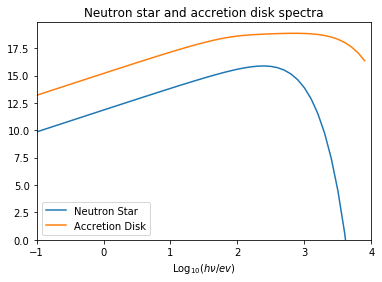

In [30]:
Radius_neut = 10**6 # centimeter
Temperature_neut = 10**6
Spectrum_neut = np.pi * BlackbodyBnu(Temperature_neut,hnu/hcont)* 4*np.pi*Radius_neut**2

Radii_neut = np.arange(1,100+dr,dr) * Radius_neut
Temps_neut = Temp(Msun,M_dot,Radii_neut)
Spectrums_neut=np.pi * BlackbodyBnu(Temps_neut[:, np.newaxis], hnu/hcont) *4*np.pi*Radii_neut[:,np.newaxis] * dr*Radius_neut
Spectrum_sum_neut = np.sum(Spectrums_neut,0)


p.plot(np.log10(hnu/ev),np.log10(Spectrum_neut),label='Neutron Star')
p.plot(np.log10(hnu/ev),np.log10(Spectrum_sum_neut), label='Accretion Disk')
p.ylim(0,np.log10(Spectrum_sum_neut.max())+1)
p.xlim(-1,4)
p.xlabel(r'Log$_{10}(h\nu/ev)$')
p.title('Neutron star and accretion disk spectra')
p.legend()
p.show()

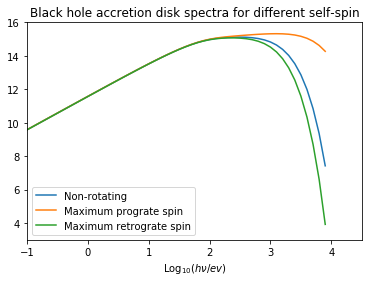

In [31]:
Radius_bh = 3**5 # centimeter

Radii_bh_1 = np.arange(3,100+dr,dr) * Radius_neut
Radii_bh_2 = np.arange(0.5,100+dr,dr) * Radius_neut
Radii_bh_3 = np.arange(4.5,100+dr,dr) * Radius_neut

Temps_bh_1 = Temp(Msun,M_dot,Radii_bh_1)
Temps_bh_2 = Temp(Msun,M_dot,Radii_bh_2)
Temps_bh_3 = Temp(Msun,M_dot,Radii_bh_3)

Spectrums_bh_1=np.pi * BlackbodyBnu(Temps_bh_1[:, np.newaxis], hnu/hcont) *4*np.pi*Radii_bh_1[:,np.newaxis] * dr*Radius_bh
Spectrums_bh_2=np.pi * BlackbodyBnu(Temps_bh_2[:, np.newaxis], hnu/hcont) *4*np.pi*Radii_bh_2[:,np.newaxis] * dr*Radius_bh
Spectrums_bh_3=np.pi * BlackbodyBnu(Temps_bh_3[:, np.newaxis], hnu/hcont) *4*np.pi*Radii_bh_3[:,np.newaxis] * dr*Radius_bh

Spectrum_sum_bh_1 = np.sum(Spectrums_bh_1,0)
Spectrum_sum_bh_2 = np.sum(Spectrums_bh_2,0)
Spectrum_sum_bh_3 = np.sum(Spectrums_bh_3,0)

p.plot(np.log10(hnu/ev),np.log10(Spectrum_sum_bh_1),label='Non-rotating')
p.plot(np.log10(hnu/ev),np.log10(Spectrum_sum_bh_2),label='Maximum prograte spin')
p.plot(np.log10(hnu/ev),np.log10(Spectrum_sum_bh_3),label='Maximum retrograte spin')

p.ylim(3,16)
p.xlim(-1,4.5)
p.xlabel(r'Log$_{10}(h\nu/ev)$')
p.title('Black hole accretion disk spectra for different self-spin')
p.legend()
p.show()